In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"doniaali101","key":"2242946be1881e3412785cb2ad41b19a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

Dataset URL: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
License(s): copyright-authors
  0% 0.00/89.0M [00:00<?, ?B/s]
100% 89.0M/89.0M [00:00<00:00, 1.19GB/s]


In [4]:
!ls

kaggle.json  sample_data  zomato-bangalore-restaurants.zip


In [5]:
!unzip zomato-bangalore-restaurants.zip -d dataset

Archive:  zomato-bangalore-restaurants.zip
  inflating: dataset/zomato.csv      


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [7]:
df = pd.read_csv('dataset/zomato.csv')

In [8]:
data = df
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
# Display shape and first rows
print("Initial shape:", df.shape)
data.head()

Initial shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
if df.empty:
    raise ValueError("Dataset loaded but contains no rows. Check your CSV file or filtering steps.")


In [12]:
# ===  Ensure 'rate' column exists ===
if 'rate' not in df.columns:
    raise ValueError("The dataset does not contain a 'rate' column.")

In [13]:
# ===  Convert 'rate' to numeric safely ===
df['rate_numeric'] = (
    df['rate']
    .astype(str)  # ensure string type
    .str.extract(r'(\d+\.?\d*)')[0]  # extract number
    .astype(float)  # convert to float
)

In [14]:
# ===  Remove rows where rate_numeric is NaN ===
df = df.dropna(subset=['rate_numeric'])
if df.empty:
    raise ValueError("All rows were removed after cleaning 'rate'. No valid ratings available.")


In [15]:
# Ensure you're working on a copy
df = df.copy()

def categorize_rating(rate):
    if rate < 3.5:
        return 'low'
    elif 3.5 <= rate < 4.2:
        return 'medium'
    else:
        return 'high'

df['rate_category'] = df['rate_numeric'].apply(categorize_rating)



In [16]:
df['rate_category'].value_counts(normalize=True)


,proportion
rate_category,
medium,0.573551
low,0.276011
high,0.150438


rate_category
medium    23897
low       11500
high       6268
Name: count, dtype: int64


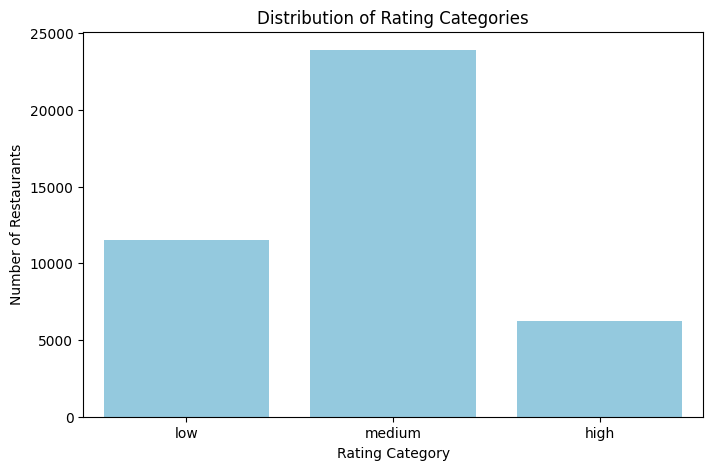

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each rating category
print(df['rate_category'].value_counts())

# Visualize the balance
plt.figure(figsize=(8,5))
sns.countplot(x='rate_category', data=df, order=['low', 'medium', 'high'], color='skyblue')
plt.title("Distribution of Rating Categories")
plt.xlabel("Rating Category")
plt.ylabel("Number of Restaurants")
plt.show()

In [18]:
# Define features (X) and target (y)
X = df.drop(["rate_category"], axis=1)
y = df["rate_category"]

In [19]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Drop non-numeric columns from X
X_numeric = X.select_dtypes(include=np.number)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

print("Shape of original data (X_numeric):", X_numeric.shape)
print("Shape of resampled data (X_resampled):", X_resampled.shape)
print("\nDistribution of target variable after SMOTE (y_resampled):")
print(y_resampled.value_counts())

Shape of original data (X_numeric): (41665, 2)
Shape of resampled data (X_resampled): (71691, 2)

Distribution of target variable after SMOTE (y_resampled):
rate_category
medium    23897
high      23897
low       23897
Name: count, dtype: int64


In [20]:
df = df.drop(['url', 'address', 'phone', 'menu_item'], axis=1)
display(df.head())
print("Shape after dropping columns:", df.shape)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate_numeric,rate_category
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,medium
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,medium
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,medium
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,medium
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,medium


Shape after dropping columns: (41665, 15)


In [21]:
# ===  Preview the cleaned DataFrame ===
print(df[['name', 'rate', 'rate_numeric', 'rate_category']].head())

                    name   rate  rate_numeric rate_category
0                  Jalsa  4.1/5           4.1        medium
1         Spice Elephant  4.1/5           4.1        medium
2        San Churro Cafe  3.8/5           3.8        medium
3  Addhuri Udupi Bhojana  3.7/5           3.7        medium
4          Grand Village  3.8/5           3.8        medium


In [22]:
missing_tokens = {"", " ", "  ", "NA", "N/A", "n/a", "na", "NaN", "nan", "-", "NEW", None}

def detect_hidden_missing(series, extra_tokens=missing_tokens):
    # Convert to string, strip spaces, then check if it's in the missing tokens set
    ser = series.astype(str).str.strip()
    mask = ser.isin(extra_tokens) | ser.eq("")
    return int(mask.sum())  # sum counts True values

print("\nHidden/explicit missing counts per column:")
for col in df.columns:
    count = detect_hidden_missing(df[col])
    if count > 0:
        print(f"{col:20s}: {count}")



Hidden/explicit missing counts per column:
rest_type           : 149
dish_liked          : 18203
cuisines            : 11
approx_cost(for two people): 247


In [23]:
extra_missing = ["", " ", "  ", "N/A", "NA", "n/a", "na", "NaN", "nan", None]
hidden_nan_report = {}
for col in df.columns:
    hidden_count = df[col].isin(extra_missing).sum()
    hidden_nan_report[col] = hidden_count

print("\nHidden NaN count per column:")
print(pd.Series(hidden_nan_report))

df.replace(extra_missing, np.nan, inplace=True)


Hidden NaN count per column:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
rate_numeric                   0
rate_category                  0
dtype: int64


In [24]:
# Handle rest_type (categorical) — replace missing with 'Unknown'
df['rest_type'] = df['rest_type'].fillna('Unknown')

# Handle dish_liked (categorical, text list) — replace with 'No info'
df['dish_liked'] = df['dish_liked'].fillna('No info')

# Handle cuisines (categorical) — replace with 'Unknown'
df['cuisines'] = df['cuisines'].fillna('Unknown')

# Handle approx_cost(for two people) (numeric disguised as string)
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .replace(',', '', regex=True)      # remove commas
    .replace('Unknown', None)
    .astype(float)
)

# Fill numeric missing cost with median
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(
    df['approx_cost(for two people)'].median()
)


In [25]:
print(df[['rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)']].isna().sum())


rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
dtype: int64


In [26]:
print("Number of unique restaurant names:", df['name'].nunique())
display(df['name'].value_counts().head())

Number of unique restaurant names: 6649


,count
name,
Cafe Coffee Day,86
Onesta,85
Empire Restaurant,69
Kanti Sweets,68
Five Star Chicken,68


In [27]:
# Keep top 20 restaurant names, group the rest as 'Other'
top_names = df['name'].value_counts().nlargest(20).index
df['name_grouped'] = df['name'].where(df['name'].isin(top_names), 'Other')


In [28]:
# Frequency encode 'name'
df['name_freq_enc'] = df['name'].map(df['name'].value_counts(normalize=True))


In [29]:
# Group rare names
top_names = df['name'].value_counts().nlargest(20).index
df['name_grouped'] = df['name'].where(df['name'].isin(top_names), 'Other')

# Frequency encode grouped names
df['name_grouped_freq_enc'] = df['name_grouped'].map(df['name_grouped'].value_counts(normalize=True))


In [30]:
# Group rare names
top_names = df['name'].value_counts().nlargest(20).index
df['name_grouped'] = df['name'].where(df['name'].isin(top_names), 'Other')

# Frequency encode grouped names
df['name_grouped_freq_enc'] = df['name_grouped'].map(df['name_grouped'].value_counts(normalize=True))


In [31]:
display(df.head())
print("Shape:", df.shape)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate_numeric,rate_category,name_grouped,name_freq_enc,name_grouped_freq_enc
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,medium,Other,0.000264,0.969807
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,medium,Other,0.000096,0.969807
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,medium,Other,0.000264,0.969807
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,medium,Other,0.000048,0.969807
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,medium,Other,0.000096,0.969807


Shape: (41665, 18)


In [32]:
# Convert Yes/No columns to 1/0 explicitly and cast to int
yes_no_cols = ['online_order', 'book_table']
df[yes_no_cols] = (
    df[yes_no_cols]
    .replace({'Yes': 1, 'No': 0})
    .astype(int)
)

# Clean and convert 'votes' column if it exists
if 'votes' in df.columns:
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)

# Display
display(df[yes_no_cols + ['votes']].head() if 'votes' in df.columns else df[yes_no_cols].head())


/tmp/ipython-input-909182855.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes': 1, 'No': 0})


,online_order,book_table,votes
0,1,1,775
1,1,0,787
2,1,0,918
3,0,0,88
4,0,0,166


In [33]:
# Frequency encode 'location' in one line
df['location_freq'] = df['location'].map(
    df['location'].value_counts(normalize=True)
).astype(float)

# Preview
display(df[['location', 'location_freq']].head())


,location,location_freq
0,Banashankari,0.017857
1,Banashankari,0.017857
2,Banashankari,0.017857
3,Banashankari,0.017857
4,Basavanagudi,0.014281


In [34]:
# Split and strip whitespace
rest_types = df['rest_type'].str.split(',').explode().str.strip()

# Pick top N frequent restaurant types
top_n = 5
top_rest_types = rest_types.value_counts().head(top_n).index

# Create dummy variables only for top rest types
for rest in top_rest_types:
    df[f"rest_type_{rest}"] = df['rest_type'].str.contains(rest, case=False, na=False).astype(int)

# Create 'Other' column for remaining categories
df['rest_type_Other'] = ~df[top_rest_types.map(lambda x: f"rest_type_{x}")].any(axis=1)
df['rest_type_Other'] = df['rest_type_Other'].astype(int)

# Display results
print(f"Kept {top_n} most common restaurant types + 'Other'")
print("Shape after encoding:", df.shape)
display(df.filter(like='rest_type_').head())


Kept 5 most common restaurant types + 'Other'
Shape after encoding: (41665, 25)


,rest_type_Quick Bites,rest_type_Casual Dining,rest_type_Cafe,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Other
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,1,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [35]:
# Clean and tokenize in one go
df['dish_liked_list'] = (
    df['dish_liked']
    .fillna('no_dishes_liked')
    .str.lower()
    .str.replace(r'[^\w\s,]', '', regex=True)   # remove punctuation except commas
    .str.split(',')
)

# Strip spaces from each dish name
df['dish_liked_list'] = df['dish_liked_list'].apply(lambda dishes: [d.strip() for d in dishes if d.strip()])

# Count frequencies directly using explode()
dish_frequency = df['dish_liked_list'].explode().value_counts()

print("Top 5 most frequently liked dishes:")
display(dish_frequency.head(5))


Top 5 most frequently liked dishes:


,count
dish_liked_list,
no info,18203
pasta,3387
burgers,3017
cocktails,2796
pizza,2702


In [36]:
import numpy as np

# Clean and tokenize
df['dish_liked_list'] = (
    df['dish_liked']
    .fillna('')  # temporary, will drop empty later
    .str.lower()
    .replace('no info', '')  # remove "no info"
    .str.replace(r'[^\w\s,]', '', regex=True)  # remove punctuation except commas
    .str.split(',')
)

# Remove empty strings from lists
df['dish_liked_list'] = df['dish_liked_list'].apply(lambda dishes: [d.strip() for d in dishes if d.strip()])

# If no dishes remain after cleaning, mark as NaN
df.loc[df['dish_liked_list'].str.len() == 0, 'dish_liked_list'] = np.nan

# Count frequencies
dish_frequency = df['dish_liked_list'].explode().value_counts()

print("Top 5 most frequently liked dishes:")
display(dish_frequency.head(5))


Top 5 most frequently liked dishes:


,count
dish_liked_list,
pasta,3387
burgers,3017
cocktails,2796
pizza,2702
biryani,2073


In [37]:
display(df.head())
print("Shape:", df.shape)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),...,name_freq_enc,name_grouped_freq_enc,location_freq,rest_type_Quick Bites,rest_type_Casual Dining,rest_type_Cafe,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Other,dish_liked_list
0,Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0.000264,0.969807,0.017857,0,1,0,0,0,0,"[pasta, lunch buffet, masala papad, paneer laj..."
1,Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0.000096,0.969807,0.017857,0,1,0,0,0,0,"[momos, lunch buffet, chocolate nirvana, thai ..."
2,San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0.000264,0.969807,0.017857,0,1,1,0,0,0,"[churros, cannelloni, minestrone soup, hot cho..."
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,...,0.000048,0.969807,0.017857,1,0,0,0,0,0,[masala dosa]
4,Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,...,0.000096,0.969807,0.014281,0,1,0,0,0,0,"[panipuri, gol gappe]"


Shape: (41665, 26)


In [38]:
# Limit one-hot encoding to top N categories
top_n = 5  # keep only the most frequent categories
top_categories = df['listed_in(type)'].value_counts().nlargest(top_n).index

# Replace rare categories with 'Other'
df['listed_in(type)_mod'] = df['listed_in(type)'].where(df['listed_in(type)'].isin(top_categories), 'Other')

# One-hot encode the modified column
df = pd.concat(
    [df, pd.get_dummies(df['listed_in(type)_mod'], prefix='listed_in_type')],
    axis=1
)

# Preview the result
display(df.filter(like='listed_in_type_').head())
print("Shape after one-hot encoding top categories:", df.shape)


,listed_in_type_Cafes,listed_in_type_Delivery,listed_in_type_Desserts,listed_in_type_Dine-out,listed_in_type_Drinks & nightlife,listed_in_type_Other
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True


Shape after one-hot encoding top categories: (41665, 33)


In [39]:
# Frequency encoding with rare category handling
threshold = 500  # minimum frequency to keep category separate
city_counts = df['listed_in(city)'].value_counts()

# Replace rare cities with "Other"
df['listed_in(city)_clean'] = df['listed_in(city)'].apply(lambda x: x if city_counts[x] >= threshold else "Other")

# Frequency encode the cleaned column
city_freq = df['listed_in(city)_clean'].value_counts(normalize=True)
df['listed_in_city_freq_encoded'] = df['listed_in(city)_clean'].map(city_freq)

# Display the result
display(df[['listed_in(city)', 'listed_in(city)_clean', 'listed_in_city_freq_encoded']].head())
print("Shape after encoding:", df.shape)


,listed_in(city),listed_in(city)_clean,listed_in_city_freq_encoded
0,Banashankari,Banashankari,0.017473
1,Banashankari,Banashankari,0.017473
2,Banashankari,Banashankari,0.017473
3,Banashankari,Banashankari,0.017473
4,Banashankari,Banashankari,0.017473


Shape after encoding: (41665, 35)


In [40]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    upper_limit = data[col].mean() + 3 * data[col].std()
    lower_limit = data[col].mean() - 3 * data[col].std()
    outliers = data.loc[(data[col] > upper_limit) | (data[col] < lower_limit)]
    print(f"Outliers in column '{col}':")
    display(outliers)
    print("-" * 30)

Outliers in column 'votes':


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_numeric
38,https://www.zomato.com/bangalore/empire-restau...,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,Yes,No,4.4/5,4884,080 49653266,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari,4.4
86,https://www.zomato.com/bangalore/meghana-foods...,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,Yes,No,4.4/5,4401,080 49653564,Jayanagar,Casual Dining,"Chicken Boneless Biryani, Hyderabadi Biryani, ...","Biryani, North Indian, Chinese",600,"[('Rated 2.0', 'RATED\n Meghana foods!!! The ...",[],Delivery,Banashankari,4.4
769,https://www.zomato.com/bangalore/vidyarthi-bha...,"32, Gandhi Bazaar, Near Gandhi Bazaar Circle, ...",Vidyarthi Bhavan,No,No,4.4/5,4460,080 26677588,Basavanagudi,Quick Bites,"Filter Kaapi, Filter Coffee, Khara Bhath, Madd...",South Indian,150,"[('Rated 5.0', 'RATED\n This is such an amazi...",[],Dine-out,Banashankari,4.4
865,https://www.zomato.com/bangalore/empire-restau...,"4 & 5, Green Orchards Layout, 1st Cross, Banne...",Empire Restaurant,Yes,No,4.3/5,3178,080 49653239,Bannerghatta Road,Casual Dining,"Chicken Satay, Mutton Brain, Egg Biryani, Pane...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 5.0', 'RATED\n Buffet Lunch @ Empire...","['Kerala Parota', 'Chicken Fried Rice', 'Tando...",Buffet,Bannerghatta Road,4.3
868,https://www.zomato.com/bangalore/barbeque-nati...,"67, 15th Cross, 6th B Main, JP Nagar, Bangalore",Barbeque Nation,No,Yes,4.7/5,3845,+91 8064806060,JP Nagar,Casual Dining,"Lunch Buffet, Goan Fish Curry, Mocktails, Chic...","North Indian, European, Mediterranean, BBQ, Kebab","1,600","[('Rated 5.0', 'RATED\n It is awesome place. ...",[],Buffet,Bannerghatta Road,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51682,https://www.zomato.com/bangalore/the-pallet-wh...,"HVP Crest, ITPL Main Road, Whitefield, Bangalore",The Pallet,No,Yes,4.5 /5,2745,080 49652944,Whitefield,"Microbrewery, Pub","Craft Beer, Wine, Chilli Chicken, Wedges, Lamb...","Continental, Mediterranean, Italian, North Ind...","1,600","[('Rated 2.0', 'RATED\n We visited this place...",[],Pubs and bars,Whitefield,4.5
51685,https://www.zomato.com/bangalore/biergarten-wh...,"2, Doddanekkundi, Whitefield Road, Mahadevpura...",Biergarten,No,Yes,4.7 /5,7064,+91 8047096233,Whitefield,"Microbrewery, Pub","Wheat Beer, Risotto, Craft Beer, Caesar Salad,...","Continental, European, BBQ, Chinese, Asian","2,400","[('Rated 3.0', 'RATED\n We had been here on a...",[],Pubs and bars,Whitefield,4.7
51686,https://www.zomato.com/bangalore/windmills-cra...,"331, Road 5B, EPIP Area, Next to KTPO, Whitefi...",Windmills Craftworks,No,No,4.6 /5,5954,+91 8880233322,Whitefield,"Microbrewery, Pub","Keema Pav, Cocktails, Craft Beer, Pork Chops, ...","American, North Indian, Salad","2,500","[('Rated 5.0', ""RATED\n A review for Windmill...",[],Pubs and bars,Whitefield,4.6
51688,https://www.zomato.com/bangalore/ji-hazoor-whi...,"TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...",Ji Hazoor,Yes,Yes,4.0 /5,2856,080 49652519,Whitefield,"Casual Dining, Bar","Chicken Salad, Mocktails, Mutton Curry, Chicke...","Mughlai, North Indian, Biryani, Afghan","1,100","[('Rated 4.0', 'RATED\n Was there on last Wed...","['Dal Tadka', 'Dal Makhani', 'Paneer Tikka Mas...",Pubs and bars,Whitefield,4.0


------------------------------
Outliers in column 'rate_numeric':


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_numeric
1570,https://www.zomato.com/bangalore/tandoor-hut-b...,"Opposite Ranka Colony, Bilekahalli, Bannerghat...",Tandoor Hut,No,No,2.2/5,90,080 68888777\r\n+91 8861767232,Bannerghatta Road,Casual Dining,"Noodles, Tandoori Chicken","North Indian, Chinese",750,"[('Rated 3.0', 'RATED\n I head that this plac...",[],Delivery,Bannerghatta Road,2.2
1647,https://www.zomato.com/bangalore/vasudev-adiga...,"204, Opposite HSBC Bank, 11th KM Stone, Bileka...",Vasudev Adiga's,No,No,2.3/5,291,+91 8494911156\r\n080 22940208,Bannerghatta Road,Casual Dining,"Coffee, Masala Dosa, Curd Rice, Idli Vada","South Indian, North Indian, Chinese, Street Fo...",250,"[('Rated 2.0', 'RATED\n A good breakfast plac...",[],Delivery,Bannerghatta Road,2.3
2028,https://www.zomato.com/bangalore/tandoor-hut-b...,"Opposite Ranka Colony, Bilekahalli, Bannerghat...",Tandoor Hut,No,No,2.2/5,90,080 68888777\r\n+91 8861767232,Bannerghatta Road,Casual Dining,"Noodles, Tandoori Chicken","North Indian, Chinese",750,"[('Rated 3.0', 'RATED\n I head that this plac...",[],Dine-out,Bannerghatta Road,2.2
2048,https://www.zomato.com/bangalore/vasudev-adiga...,"204, Opposite HSBC Bank, 11th KM Stone, Bileka...",Vasudev Adiga's,No,No,2.3/5,291,+91 8494911156\r\n080 22940208,Bannerghatta Road,Casual Dining,"Coffee, Masala Dosa, Curd Rice, Idli Vada","South Indian, North Indian, Chinese, Street Fo...",250,"[('Rated 2.0', 'RATED\n A good breakfast plac...",[],Dine-out,Bannerghatta Road,2.3
2317,https://www.zomato.com/bangalore/mast-kalandar...,"287, Ground Floor, 15th Cross, 5th Phase, JP N...",Mast Kalandar,No,No,2.3/5,175,080 41104644\r\n080 41104655,JP Nagar,Casual Dining,"Raita, Thali, Paratha, Chole, Buttermilk, Pane...",North Indian,450,"[('Rated 2.0', ""RATED\n They have many beache...",[],Dine-out,Bannerghatta Road,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49415,https://www.zomato.com/bangalore/mast-kalandar...,"GMR Complex, Ground Floor, Opposite Bangalore ...",Mast Kalandar,No,No,2.1 /5,338,080 40901100,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450,"[('Rated 2.0', 'RATED\n Food was kind of OK ,...",[],Delivery,Sarjapur Road,2.1
49750,https://www.zomato.com/bangalore/madurai-idly-...,"Sarjapura Main Road, Sarjapur Road, Bangalore",Madurai Idly Shop,No,No,2.1 /5,193,+91 9148186352,Sarjapur Road,Quick Bites,"Idli, Vada, Pongal, Filter Coffee, Mini Idlis,...",South Indian,200,"[('Rated 1.0', 'RATED\n Well the person on th...",[],Dine-out,Sarjapur Road,2.1
49919,https://www.zomato.com/bangalore/bhagini-bella...,"17/4, Outer Ring Road, Bellandur Circle, Bella...",Bhagini,No,No,2.3 /5,132,080 28439882\n080 41604064,Bellandur,Casual Dining,"Masala Peanuts, Chicken Biryani, Roti","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n It was our friend bd...",[],Dine-out,Sarjapur Road,2.3
49964,https://www.zomato.com/bangalore/mast-kalandar...,"GMR Complex, Ground Floor, Opposite Bangalore ...",Mast Kalandar,No,No,2.1 /5,338,080 40901100,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450,"[('Rated 2.0', 'RATED\n Food was kind of OK ,...",[],Dine-out,Sarjapur Road,2.1


------------------------------


In [41]:
import numpy as np
import pandas as pd

# Make a safe copy to avoid SettingWithCopyWarning
df = df.copy()

# Helper: extract first numeric token from strings like "4.1/5", "1,200", "4"
def extract_first_number(series):
    # returns numeric Series with NaNs where parsing fails
    extracted = series.astype(str).str.extract(r'([0-9]+(?:\.[0-9]+)?)')[0]
    return pd.to_numeric(extracted, errors='coerce')

# 1) Create or sanitize rate_numeric
if 'rate_numeric' in df.columns:
    df['rate_numeric'] = pd.to_numeric(df['rate_numeric'], errors='coerce')
else:
    if 'rate' in df.columns:
        df['rate_numeric'] = extract_first_number(df['rate'])
    else:
        df['rate_numeric'] = np.nan

# If rate_numeric is nearly all NaN, show examples of raw 'rate' values for debugging
if df['rate_numeric'].isna().mean() > 0.95:
    print("WARNING: >95% of 'rate_numeric' are NaN after extraction. Example raw 'rate' values:")
    print(df['rate'].dropna().unique()[:30])

# 2) Clean approx_cost(for two people)
cost_col = 'approx_cost(for two people)'
if cost_col in df.columns:
    # remove commas, currency symbols, keep first numeric part
    tmp = df[cost_col].astype(str).str.replace(',', '', regex=False)
    df['approx_cost_clean'] = extract_first_number(tmp)
else:
    df['approx_cost_clean'] = np.nan

# 3) Ensure votes and review_count numeric (if present)
for c in ['votes', 'review_count']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    else:
        df[c] = np.nan

# 4) Build list of columns we want to log-transform (original names -> cleaned names)
transform_candidates = {
    'rate': 'rate_numeric',              # use the cleaned / numeric rate
    'votes': 'votes',
    'approx_cost(for two people)': 'approx_cost_clean',
    'review_count': 'review_count'
}

# 5) Prepare result container & perform safe pre-log steps
processed = {}
for orig_col, clean_col in transform_candidates.items():
    if clean_col not in df.columns:
        print(f"Column '{clean_col}' not found — skipping.")
        continue

    col_series = df[clean_col]

    nonnull_count = col_series.notna().sum()
    total_count = len(col_series)
    print(f"\nColumn '{clean_col}': non-null = {nonnull_count}/{total_count}")

    if nonnull_count == 0:
        print(f"  -> No numeric data for '{clean_col}', skipping log transform.")
        processed[clean_col] = False
        continue

    # 5a) clip negative values to NaN (log1p undefined for < -1 ; clip to >=0 safer)
    neg_count = (col_series < 0).sum()
    if neg_count > 0:
        print(f"  -> Found {neg_count} negative values in '{clean_col}', setting them to NaN before filling.")
        df.loc[df[clean_col] < 0, clean_col] = np.nan

    # 5b) compute median on remaining valid values
    median_val = df[clean_col].median(skipna=True)
    if pd.isna(median_val):
        print(f"  -> Median for '{clean_col}' is NaN (no valid numbers). Skipping this column.")
        processed[clean_col] = False
        continue

    # 5c) fill NaNs with median (use assignment to avoid chained warning)
    df.loc[:, clean_col] = df[clean_col].fillna(median_val)

    # 5d) ensure all values >= 0 (clip)
    df.loc[:, clean_col] = df[clean_col].clip(lower=0)

    # 5e) create log1p column
    log_col = f"{clean_col}_log1p"
    # Use np.log1p on numpy array to avoid warnings from pandas internals
    arr = df[clean_col].to_numpy(dtype=float)
    with np.errstate(invalid='ignore'):
        arr_log = np.log1p(arr)
    df.loc[:, log_col] = arr_log

    # diagnostics
    print(f"  -> Filled NaNs with median={median_val:.6g}, created '{log_col}', "
          f"nan count after transform: {np.isnan(df[log_col]).sum()}")
    processed[clean_col] = True

# 6) Summary of processed columns
print("\nSummary (processed True means log column created):")
for k, v in processed.items():
    print(f" - {k}: {v}")

# 7) Show skewness for newly created log columns
print("\nSkewness of log1p columns (if created):")
for orig_col, clean_col in transform_candidates.items():
    log_col = f"{clean_col}_log1p"
    if log_col in df.columns:
        sk = pd.Series(df[log_col]).skew()
        print(f" {log_col}: {sk:.4f}")

# 8) Optional: quick preview of new columns
preview_cols = [c for c in df.columns if c.endswith('_log1p')]
if preview_cols:
    print("\nPreview of log columns (first 5 rows):")
    display(df[preview_cols].head())
else:
    print("\nNo log columns were created. Check messages above to see why.")

# End of preprocessing block.



Column 'rate_numeric': non-null = 41665/41665
  -> Filled NaNs with median=3.7, created 'rate_numeric_log1p', nan count after transform: 0

Column 'votes': non-null = 41665/41665
  -> Filled NaNs with median=73, created 'votes_log1p', nan count after transform: 0

Column 'approx_cost_clean': non-null = 41665/41665
  -> Filled NaNs with median=500, created 'approx_cost_clean_log1p', nan count after transform: 0

Column 'review_count': non-null = 0/41665
  -> No numeric data for 'review_count', skipping log transform.

Summary (processed True means log column created):
 - rate_numeric: True
 - votes: True
 - approx_cost_clean: True
 - review_count: False

Skewness of log1p columns (if created):
 rate_numeric_log1p: -0.6190
 votes_log1p: 0.3126
 approx_cost_clean_log1p: 0.2060

Preview of log columns (first 5 rows):


,rate_numeric_log1p,votes_log1p,approx_cost_clean_log1p
0,1.629241,6.654153,6.685861
1,1.629241,6.669498,6.685861
2,1.568616,6.823286,6.685861
3,1.547563,4.488636,5.707110
4,1.568616,5.117994,6.398595


In [42]:
import numpy as np
import pandas as pd

# Select the numerical columns to log-transform
cols_to_log_transform = ['rate_numeric', 'votes', 'approx_cost_clean']

print("Skewness before log transformation:")
for col in cols_to_log_transform:
    if col in df.columns:
        print(f"  {col}: {df[col].skew():.4f}")
    else:
        print(f"  {col}: Column not found")


# Apply log1p transformation to selected columns in the main DataFrame 'df'
for col in cols_to_log_transform:
    if col in df.columns:
        # Handle potential non-positive values before log1p
        # Ensure values are non-negative (clip at 0)
        df[col] = df[col].clip(lower=0)
        # Apply log1p transformation
        df[f'{col}_log1p'] = np.log1p(df[col])


print("\nSkewness after log1p transformation:")
for col in cols_to_log_transform:
    log_col = f'{col}_log1p'
    if log_col in df.columns:
        print(f"  {log_col}: {df[log_col].skew():.4f}")
    else:
         print(f"  {log_col}: Column not created")

# Optional: Display the first few rows with the new log-transformed columns
preview_cols = [f'{col}_log1p' for col in cols_to_log_transform if f'{col}_log1p' in df.columns]
print("\nPreview of log-transformed columns:")
display(df[preview_cols].head())

Skewness before log transformation:
  rate_numeric: -0.3286
  votes: 6.8722
  approx_cost_clean: 2.4458

Skewness after log1p transformation:
  rate_numeric_log1p: -0.6190
  votes_log1p: 0.3126
  approx_cost_clean_log1p: 0.2060

Preview of log-transformed columns:


,rate_numeric_log1p,votes_log1p,approx_cost_clean_log1p
0,1.629241,6.654153,6.685861
1,1.629241,6.669498,6.685861
2,1.568616,6.823286,6.685861
3,1.547563,4.488636,5.707110
4,1.568616,5.117994,6.398595


In [43]:
# Select only numeric columns before calculating skewness
numeric_df = df.select_dtypes(include=np.number)

# Calculate skewness
skewed = numeric_df.skew().sort_values(ascending=False)

# Identify highly skewed features
skewed_features = skewed[abs(skewed) > 0.75].index
print("Highly skewed features (absolute skew > 0.75):")
display(skewed_features)

Highly skewed features (absolute skew > 0.75):


Index(['votes', 'rest_type_Dessert Parlor', 'rest_type_Delivery',
       'rest_type_Cafe', 'approx_cost(for two people)', 'approx_cost_clean',
       'rest_type_Other', 'name_freq_enc', 'book_table', 'location_freq',
       'rest_type_Casual Dining', 'name_grouped_freq_enc'],
      dtype='object')

In [44]:
data.duplicated().sum()

np.int64(0)

In [45]:
#  Basic Info & Missing Values
# ===============================
print("\nData Overview:")
print(df.head())
print("\nShape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\n Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\n Missing Value Percentage:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Data Overview:
                    name  online_order  book_table   rate  votes  \
0                  Jalsa             1           1  4.1/5    775   
1         Spice Elephant             1           0  4.1/5    787   
2        San Churro Cafe             1           0  3.8/5    918   
3  Addhuri Udupi Bhojana             0           0  3.7/5     88   
4          Grand Village             0           0  3.8/5    166   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe  

In [46]:
#  Descriptive Statistics
# ===============================
print("\n Numerical Summary:")
print(df.describe())

print("\n Categorical Summary:")
print(df.describe(include=['O']))



 Numerical Summary:
       online_order    book_table         votes  approx_cost(for two people)  \
count  41665.000000  41665.000000  41665.000000                 41665.000000   
mean       0.652970      0.151302    351.653018                   602.655850   
std        0.476031      0.358347    881.800960                   463.017327   
min        0.000000      0.000000      0.000000                    40.000000   
25%        0.000000      0.000000     21.000000                   300.000000   
50%        1.000000      0.000000     73.000000                   500.000000   
75%        1.000000      0.000000    276.000000                   700.000000   
max        1.000000      1.000000  16832.000000                  6000.000000   

       rate_numeric  name_freq_enc  name_grouped_freq_enc  location_freq  \
count  41665.000000   41665.000000           41665.000000   41665.000000   
mean       3.700449       0.000332               0.940572       0.031644   
std        0.440513       0.00

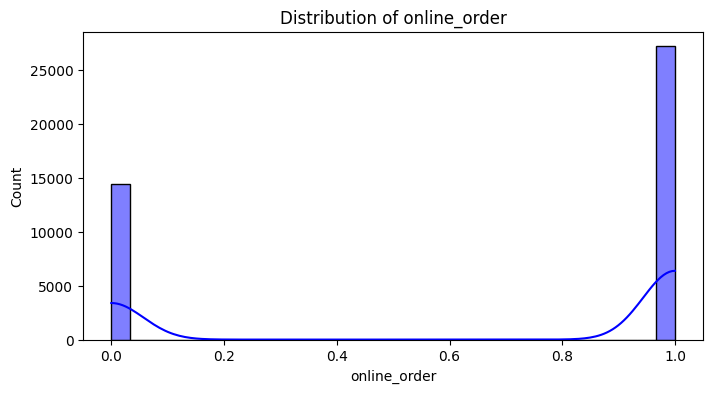

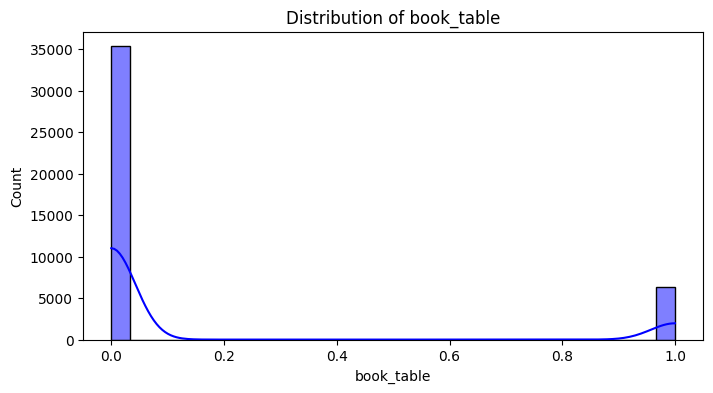

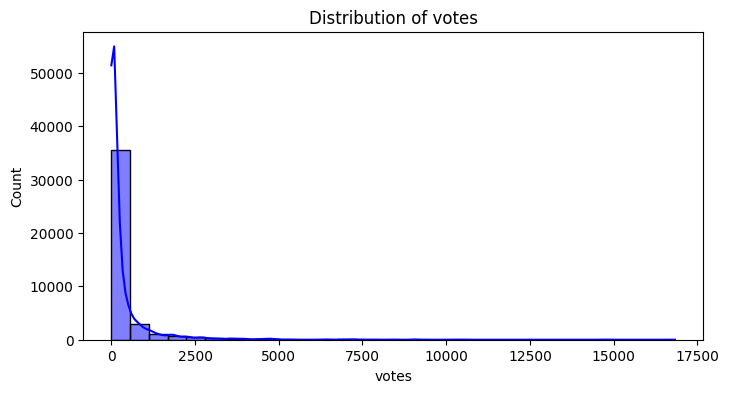

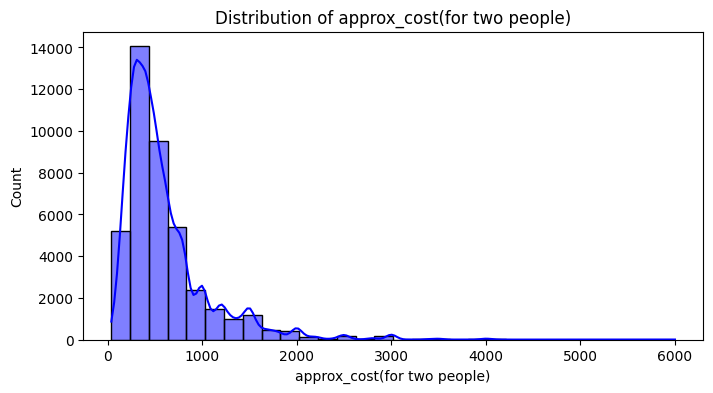

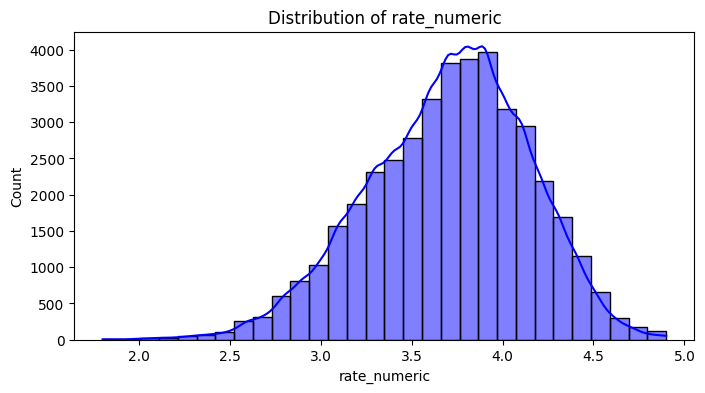

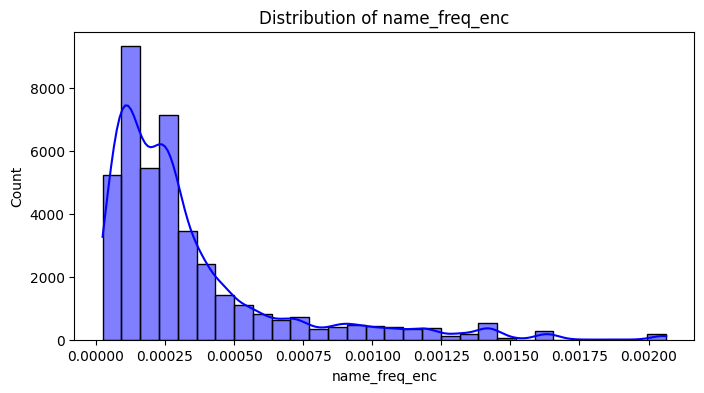

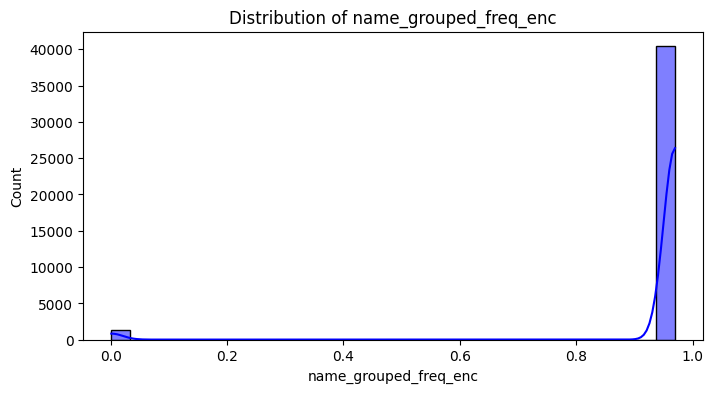

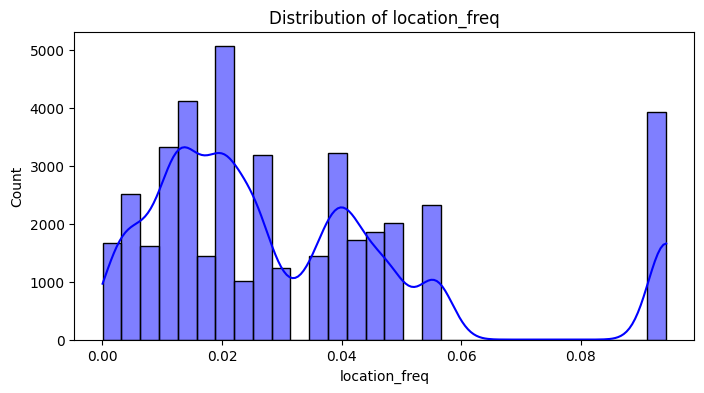

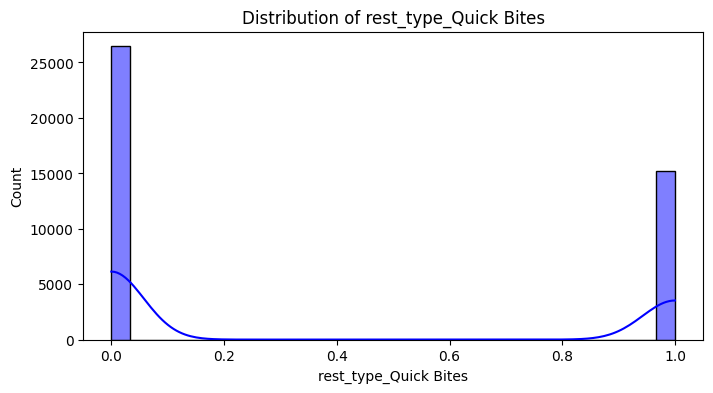

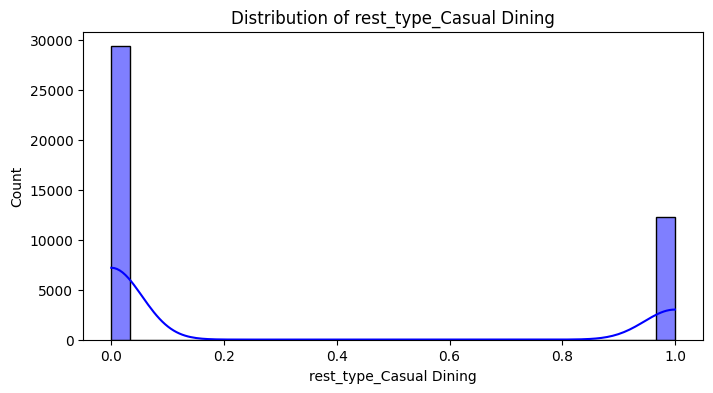

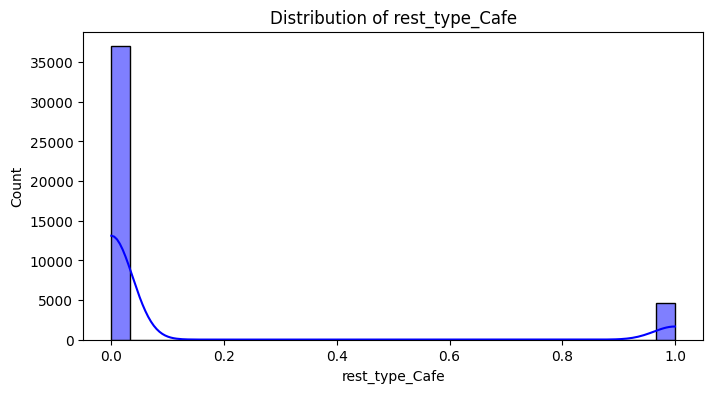

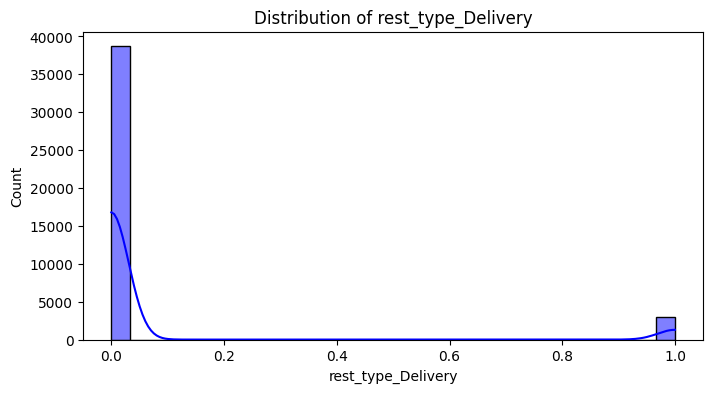

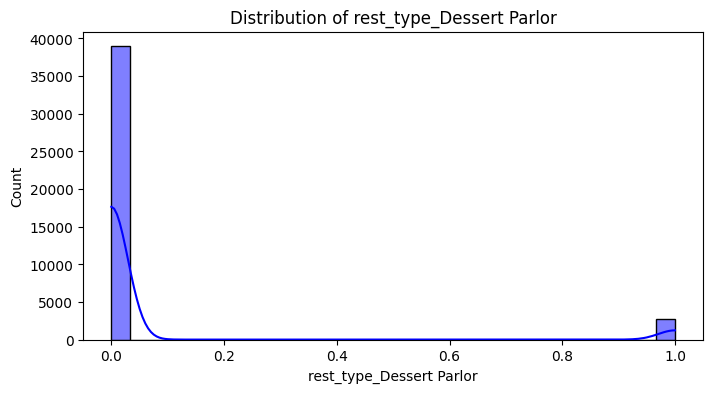

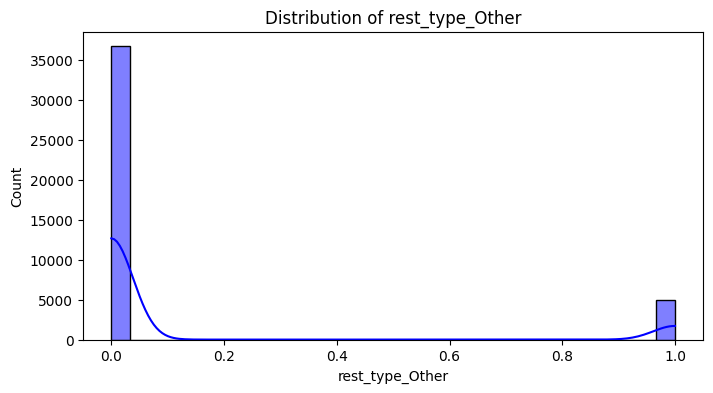

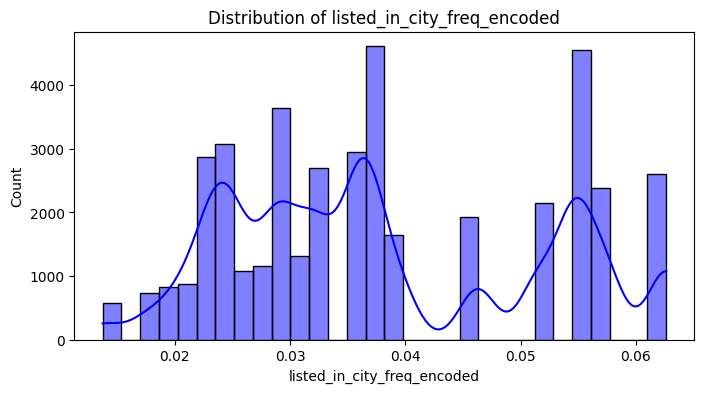

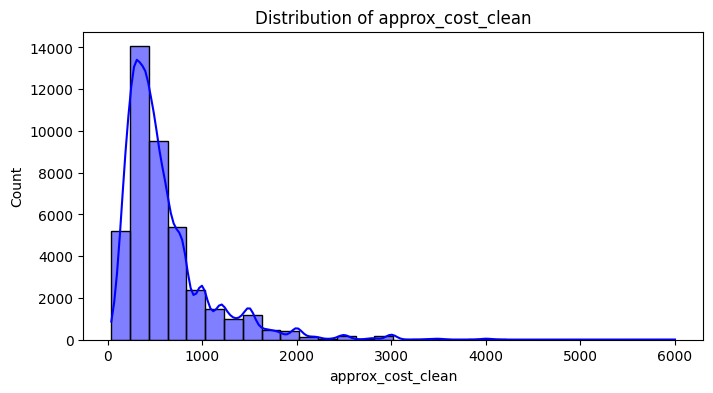

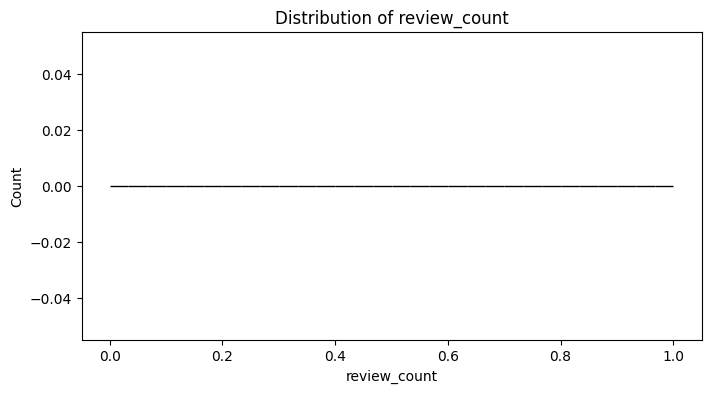

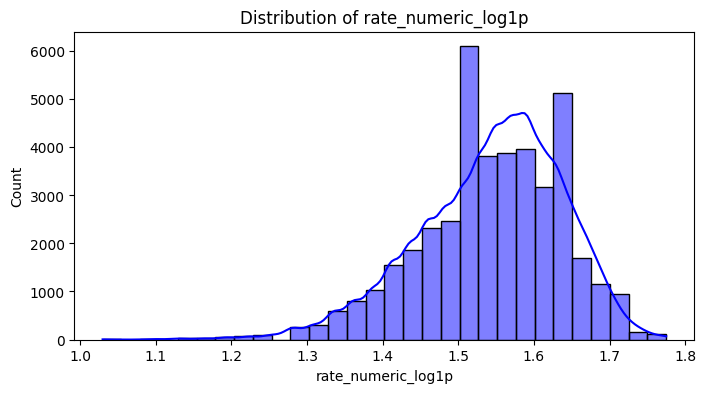

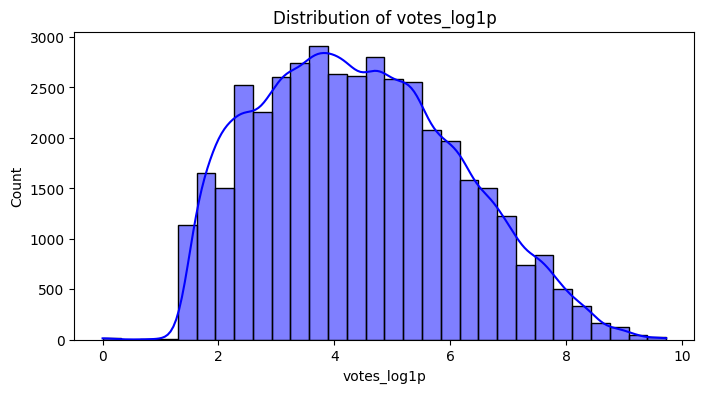

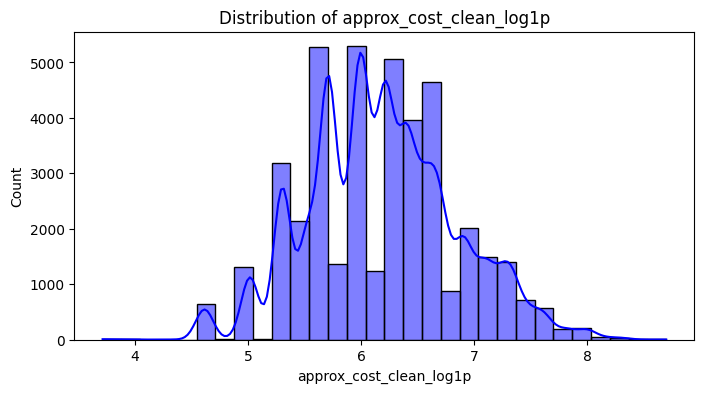

In [47]:
# Numerical Features
# ===============================
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()


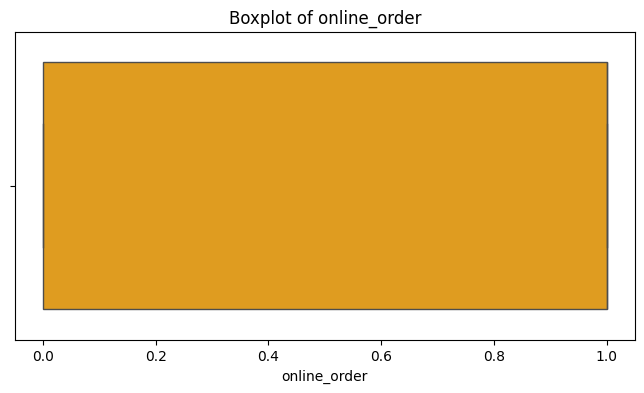

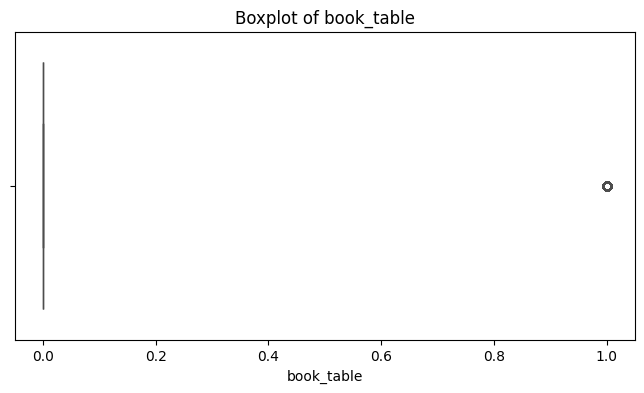

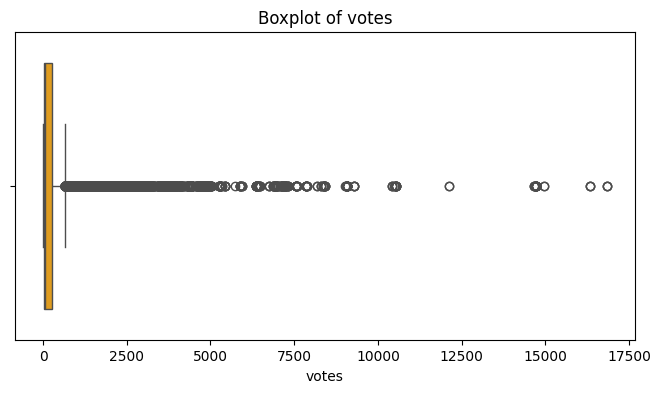

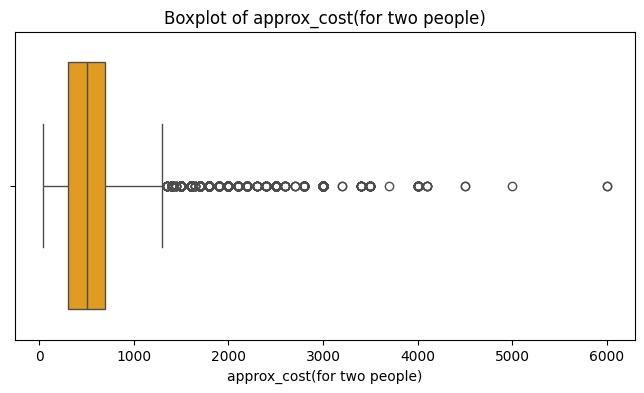

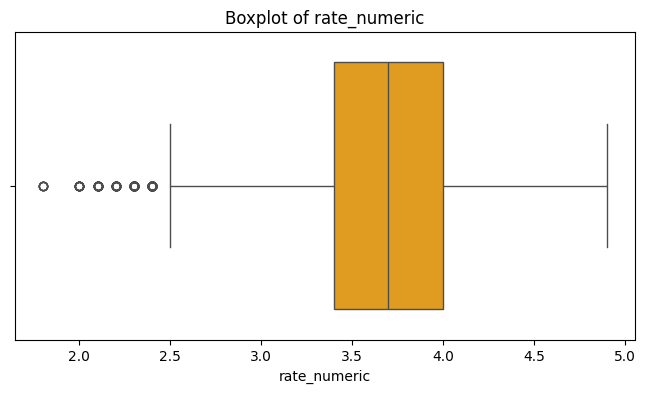

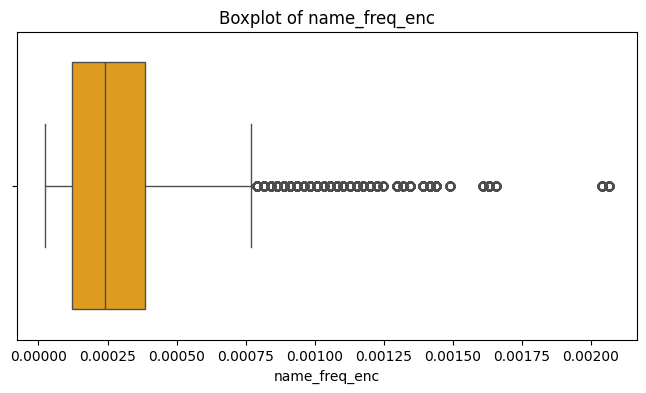

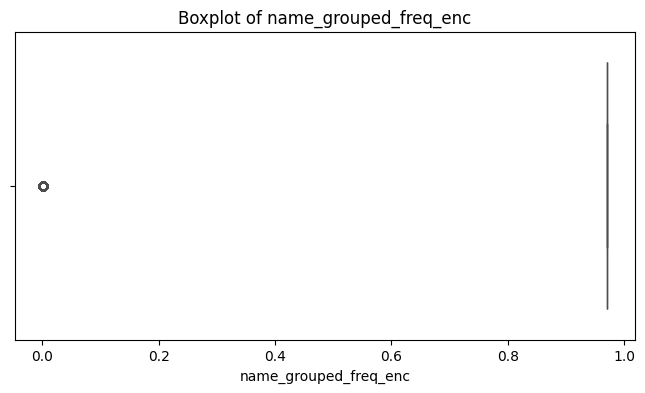

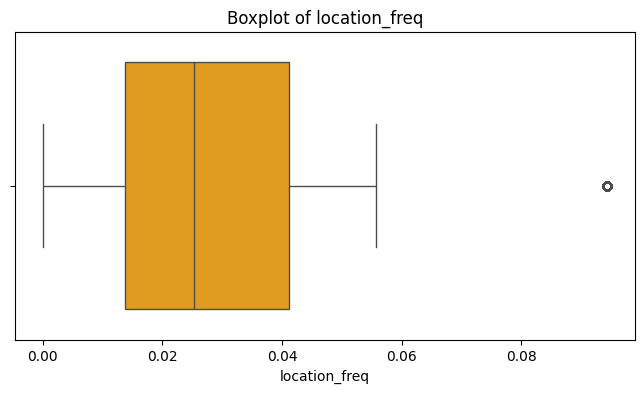

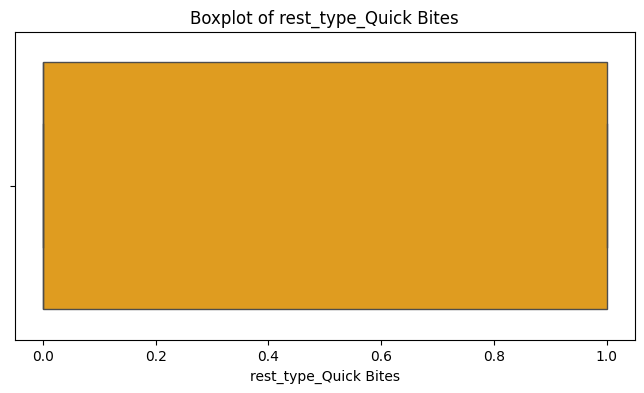

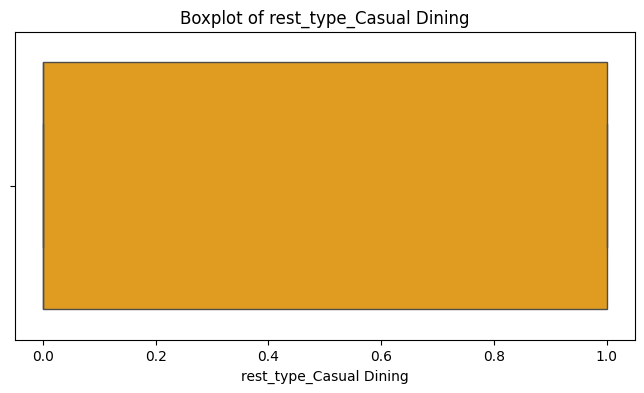

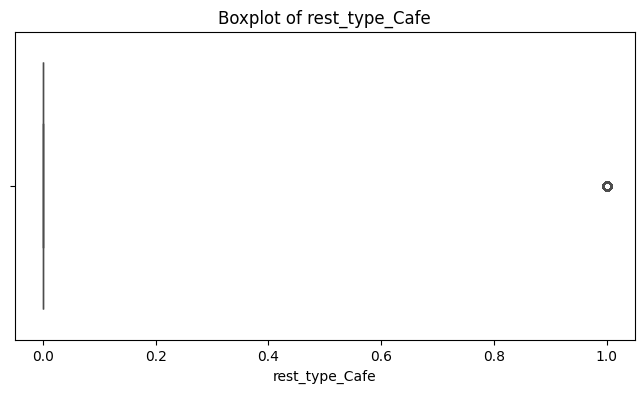

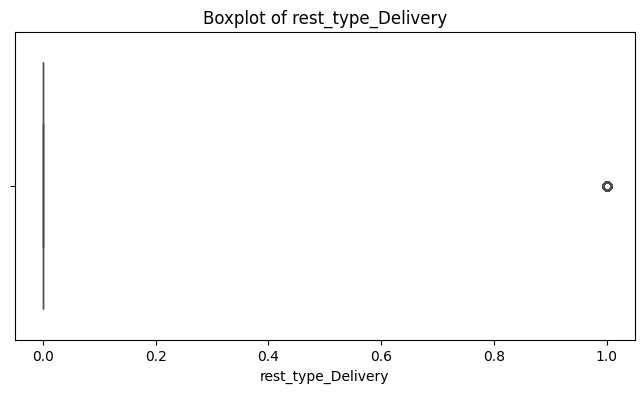

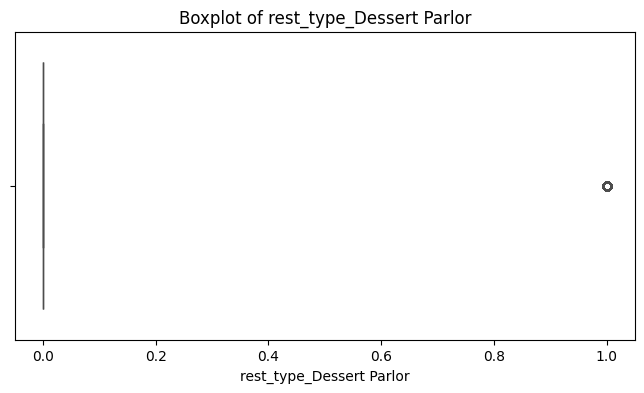

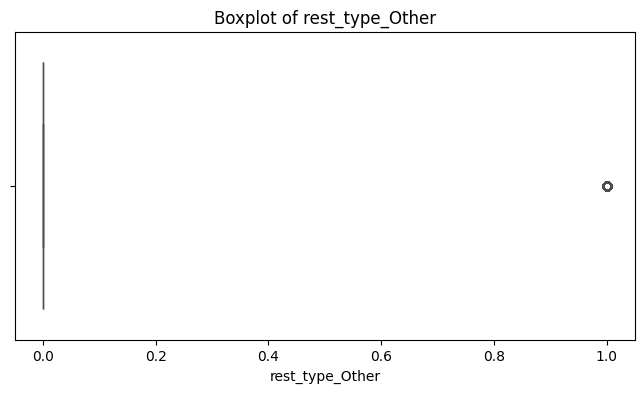

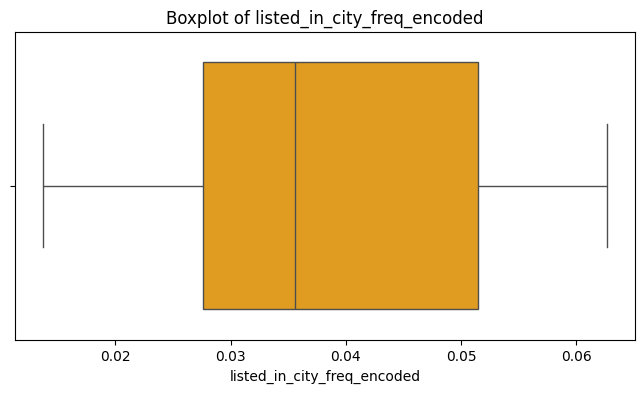

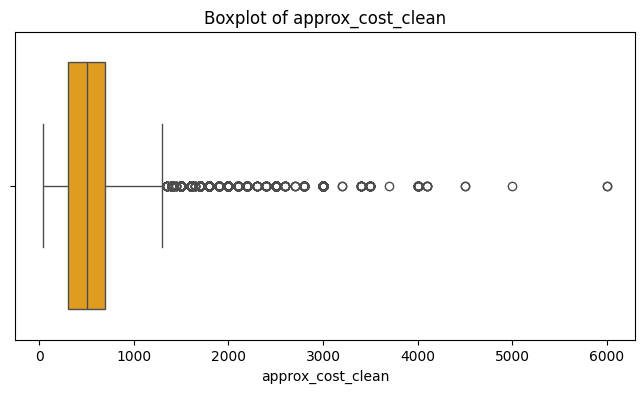

Skipping 'review_count' — no valid numeric data.


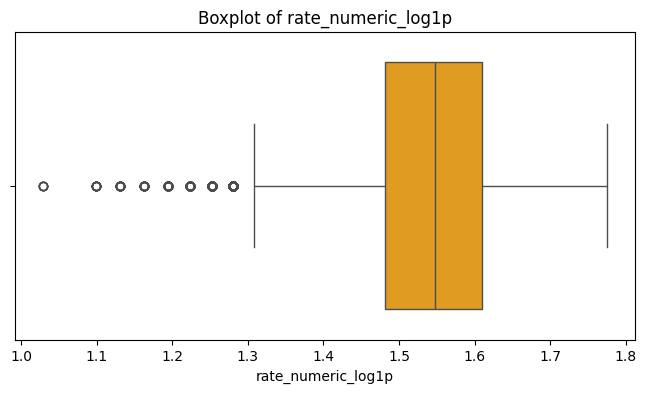

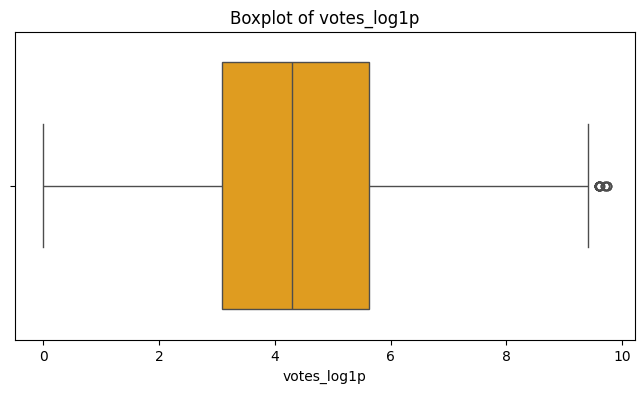

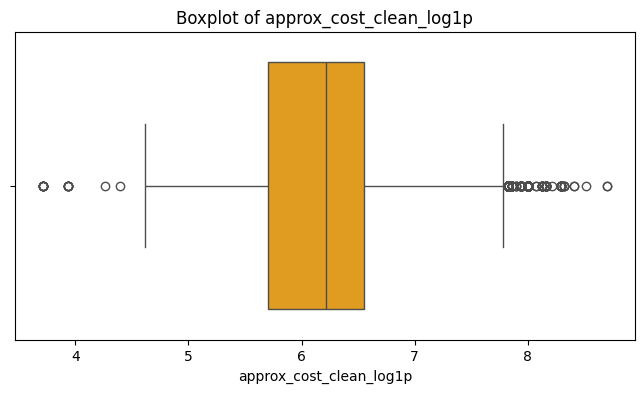

In [48]:
for col in numerical_cols:
    # Skip if column is empty or has no numeric values
    if df[col].dropna().empty:
        print(f"Skipping '{col}' — no valid numeric data.")
        continue

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col].dropna(), color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()


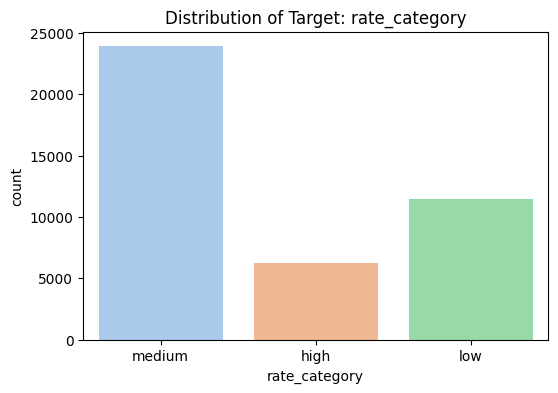

In [49]:
#  Target Variable Analysis
# ===============================
target_col = "rate_category"
if target_col in df.columns:
    if df[target_col].dtype == 'object':
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=target_col, palette='pastel', hue=target_col, legend=False)
        plt.title(f"Distribution of Target: {target_col}")
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        sns.histplot(df[target_col], kde=True, color='green')
        plt.title(f"Distribution of Target: {target_col}")
        plt.show()

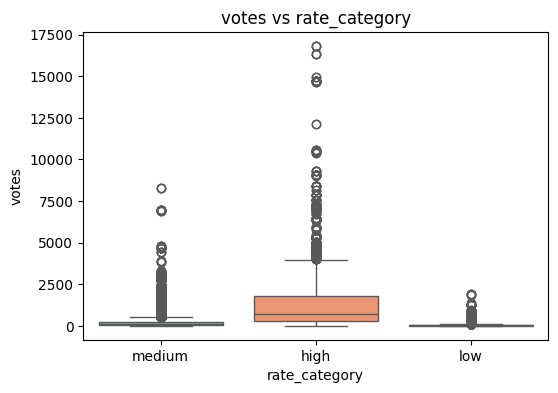

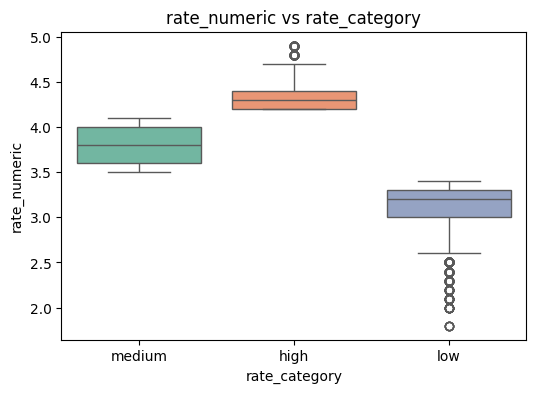

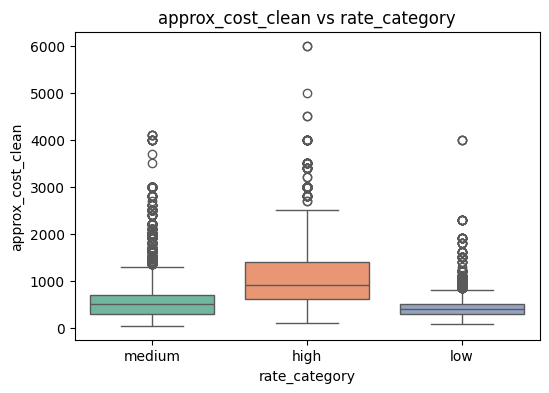

In [50]:
# Relationships
# ===============================
target_col = "rate_category"

# Identify numerical columns
numerical_cols = ['votes', 'rate_numeric', 'approx_cost_clean']

if target_col in df.columns:
    for col in numerical_cols:
        if col in df.columns and col != target_col:
            plt.figure(figsize=(6,4))
            sns.boxplot(data=df, x=target_col, y=col, palette='Set2', hue=target_col, legend=False)
            plt.title(f"{col} vs {target_col}")
            plt.show()



In [51]:
# Average rating by location
df.groupby('location')['rate_numeric'].mean().sort_values(ascending=False)

,rate_numeric
location,
Lavelle Road,4.142505
Koramangala 3rd Block,4.020419
St. Marks Road,4.017201
Koramangala 5th Block,4.005821
Church Street,3.992125
...,...
Rammurthy Nagar,3.346154
North Bangalore,3.340000
Peenya,3.200000


In [52]:
# Count of restaurant types by location
pd.crosstab(df['location'], df['listed_in(type)']).sort_index()

listed_in(type),Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,22,71,2466,129,1210,19,13
Banashankari,7,36,347,57,284,13,0
Banaswadi,0,20,235,25,193,6,1
Bannerghatta Road,9,37,644,83,451,9,2
Basavanagudi,7,11,301,52,219,5,0
...,...,...,...,...,...,...,...
West Bangalore,0,0,3,0,0,0,0
Whitefield,26,47,747,92,594,46,30
Wilson Garden,3,0,109,6,66,2,1


In [53]:
df.groupby('rest_type')['rate_numeric'].mean().sort_values(ascending=False)

,rate_numeric
rest_type,
"Pub, Cafe",4.657500
"Bar, Pub",4.600000
Microbrewery,4.478571
"Pub, Microbrewery",4.452632
"Microbrewery, Bar",4.446154
...,...
Unknown,3.240940
"Food Court, Casual Dining",3.240000
"Bakery, Beverage Shop",3.200000


In [54]:
# Create 'chain_status' based on name frequency
name_counts = df['name'].value_counts()
df['chain_status'] = df['name'].apply(lambda x: 'Chain' if name_counts[x] > 1 else 'Independent')

# Compare average votes and ratings between chains and independent restaurants
print("Average Votes by Chain Status:")
display(df.groupby('chain_status')['votes'].mean())

print("\nAverage Rating by Chain Status:")
display(df.groupby('chain_status')['rate_numeric'].mean())

Average Votes by Chain Status:


,votes
chain_status,
Chain,356.211258
Independent,77.737537



Average Rating by Chain Status:


,rate_numeric
chain_status,
Chain,3.703484
Independent,3.518035


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use existing numerical columns for clustering
features = df[['approx_cost_clean', 'rate_numeric', 'votes']].fillna(0) # Fill NaN with 0 as StandardScaler does not accept NaN
scaled = StandardScaler().fit_transform(features)

# Assuming you want to cluster locations (neighborhoods)
# You might want to aggregate features by location first
location_features = df.groupby('location')[['approx_cost_clean', 'rate_numeric', 'votes']].mean().fillna(0)


# Scale the aggregated features
scaled_location_features = StandardScaler().fit_transform(location_features)


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Added n_init for KMeans
location_features['cluster'] = kmeans.fit_predict(scaled_location_features)

# Display the clusters and their characteristics (average of features)
print("Cluster characteristics (average feature values per cluster):")
display(location_features.groupby('cluster')[['approx_cost_clean', 'rate_numeric', 'votes']].mean())

# Optional: Show which locations belong to which cluster
print("\nLocations per cluster (first 10 in each):")
for cluster_id in sorted(location_features['cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(location_features[location_features['cluster'] == cluster_id].index.tolist()[:10])

Cluster characteristics (average feature values per cluster):


,approx_cost_clean,rate_numeric,votes
cluster,,,
0,408.185196,3.458197,82.275058
1,891.728529,4.016123,888.661864
2,504.939607,3.655167,178.610799
3,832.952971,3.796293,393.184727
4,2582.692308,3.965385,246.576923



Locations per cluster (first 10 in each):

Cluster 0:


['Banaswadi',
 'Bannerghatta Road',
 'Bommanahalli',
 'CV Raman Nagar',
 'City Market',
 'Commercial Street',
 'East Bangalore',
 'Ejipura',
 'Electronic City',
 'Hennur']


Cluster 1:


['Church Street',
 'Koramangala 3rd Block',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Lavelle Road',
 'St. Marks Road']


Cluster 2:


['BTM',
 'Banashankari',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Brookefield',
 'Central Bangalore',
 'Domlur',
 'Frazer Town',
 'HBR Layout']


Cluster 3:


['Brigade Road',
 'Cunningham Road',
 'Indiranagar',
 'Infantry Road',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Langford Town',
 'MG Road',
 'Malleshwaram',
 'Old Airport Road']


Cluster 4:


['Sankey Road']

In [56]:
# Map the cluster assignments back to the original DataFrame
# Ensure 'location' is in df and location_features index matches df['location']
if 'location' in df.columns and df['location'].isin(location_features.index).all():
    df['location_cluster'] = df['location'].map(location_features['cluster'])

    # Perform a crosstab between the location cluster and cuisines
    # Using the original 'cuisines' column (cleaned in previous steps)
    if 'location_cluster' in df.columns and 'cuisines' in df.columns:
        print("Crosstab of Location Cluster and Cuisines:")
        display(pd.crosstab(df['location_cluster'], df['cuisines']))
    else:
        print("Could not perform crosstab. 'location_cluster' or 'cuisines' column not found.")
else:
    print("Could not map clusters back to DataFrame. 'location' column not found or locations do not match.")

Crosstab of Location Cluster and Cuisines:


cuisines,"African, Burger","African, Burger, Desserts, Beverages, Fast Food",American,"American, Asian, Continental, North Indian, South Indian, Chinese","American, Asian, European, North Indian","American, BBQ","American, Burger, Fast Food","American, Burger, Italian, Steak","American, Burger, Momos, Bengali","American, Cafe, Continental",...,"Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts","Turkish, Chinese","Turkish, Desserts","Turkish, Fast Food","Turkish, Fast Food, Biryani, Chinese","Turkish, Rolls",Unknown,Vietnamese,"Vietnamese, Salad","Vietnamese, Thai, Burmese, Japanese"
location_cluster,,,,,,,,,,,,,,,,,,,,,
0,8,0,0,0,0,0,14,3,0,0,...,0,0,0,0,1,0,3,0,0,0
1,0,0,0,0,0,12,0,0,0,0,...,0,0,11,0,0,6,0,14,0,0
2,3,2,7,0,0,0,0,0,3,0,...,3,6,0,5,0,7,6,7,0,0
3,0,0,7,12,8,0,0,0,0,17,...,0,0,0,0,0,0,2,2,2,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.groupby(['location', 'cuisines']).size().reset_index(name='count').sort_values(['location', 'count'], ascending=[True, False])

,location,cuisines,count
199,BTM,"North Indian, Chinese",342
185,BTM,North Indian,253
117,BTM,Fast Food,104
97,BTM,"Chinese, North Indian",80
44,BTM,Biryani,77
...,...,...,...
6517,Yeshwantpur,"North Indian, Chinese, South Indian, Mughlai",1
6522,Yeshwantpur,"North Indian, South Indian, Chinese",1
6523,Yeshwantpur,"North Indian, Street Food",1
6530,Yeshwantpur,Street Food,1


In [58]:
# Attempt to identify potential vegetarian localities based on cuisine types
# NOTE: This is an approximation as there is no direct 'is_vegetarian' column.

# Define a list of cuisines that are often purely vegetarian or have strong vegetarian options
likely_veg_cuisines = ['South Indian', 'Pure Veg', 'Vegetarian'] # Added 'Vegetarian'

# Function to check if a restaurant offers a likely vegetarian cuisine
def has_likely_veg_cuisine(cuisine_list):
    if pd.isna(cuisine_list):
        return False
    # Check if any of the listed cuisines are in the likely_veg_cuisines list (case-insensitive check)
    # Assuming cuisines are comma-separated strings in the 'cuisines' column
    cuisines_in_row = [c.strip() for c in str(cuisine_list).split(',')]
    for veg_cuisine in likely_veg_cuisines:
        if veg_cuisine.lower() in [c.lower() for c in cuisines_in_row]:
            return True
    return False

# Create a new column indicating if the restaurant has a likely vegetarian cuisine
df['has_likely_veg'] = df['cuisines'].apply(has_likely_veg_cuisine).astype(int)

# Group by location and calculate the proportion of restaurants with likely veg cuisines
veg_proportion_by_location = df.groupby('location')['has_likely_veg'].mean().sort_values(ascending=False)

print("Proportion of restaurants with likely vegetarian cuisines by location (approximate):")
display(veg_proportion_by_location.head(10)) # Display top 10 locations

Proportion of restaurants with likely vegetarian cuisines by location (approximate):


,has_likely_veg
location,
Nagarbhavi,1.000000
Yelahanka,0.800000
Mysore Road,0.764706
Kanakapura Road,0.631579
City Market,0.513158
Majestic,0.495495
Jalahalli,0.478261
Vijay Nagar,0.468750
Uttarahalli,0.444444


In [59]:
most_common_rating = df['rate_numeric'].mode()[0]
print("Q9: Most common average rating:", most_common_rating)

Q9: Most common average rating: 3.9


In [60]:
correlation_cost_rating = df['approx_cost(for two people)'].corr(df['rate_numeric'])
print("Q10: Correlation between cost and rating:", correlation_cost_rating)

Q10: Correlation between cost and rating: 0.38404237397213237


In [61]:
most_common_cuisine = df['cuisines'].value_counts().idxmax()
print("Q11: Most frequent cuisine:", most_common_cuisine)

Q11: Most frequent cuisine: North Indian


In [62]:
online_order_percent = df['online_order'].mean() * 100
print("Q12: Percentage offering online ordering:", online_order_percent, "%")

Q12: Percentage offering online ordering: 65.29701188047522 %


In [63]:
# Filter for restaurants offering both table booking and online ordering
delivery_and_dine_in = df[(df['book_table'] == 1) & (df['online_order'] == 1)]

# Calculate the average numerical rating for these restaurants
avg_rating = delivery_and_dine_in['rate_numeric'].mean()

print("Q13: Average rating for restaurants with both delivery & dine-in:", avg_rating)

Q13: Average rating for restaurants with both delivery & dine-in: 4.131433137986147


In [64]:
# Drop columns that are not needed for modeling or have already been encoded/processed
columns_to_drop = [
    'name', 'rate', 'location', 'rest_type', 'dish_liked',
    'cuisines', 'reviews_list', 'listed_in(type)', 'listed_in(city)',
    'name_grouped', 'dish_liked_list', 'listed_in(type)_mod', 'listed_in(city)_clean',
    'approx_cost(for two people)', # Dropping the original cost column
    'review_count', # Drop the column with all NaN values identified earlier
    'rate_numeric' # Dropping original numeric rate as log1p is used
]

# Drop columns if they exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Display the shape of the DataFrame after dropping columns
print("Shape after dropping unnecessary columns:", df.shape)

# Display the first few rows to preview the remaining columns
display(df.head())

Shape after dropping unnecessary columns: (41665, 27)


,online_order,book_table,votes,rate_category,name_freq_enc,name_grouped_freq_enc,location_freq,rest_type_Quick Bites,rest_type_Casual Dining,rest_type_Cafe,...,listed_in_type_Drinks & nightlife,listed_in_type_Other,listed_in_city_freq_encoded,approx_cost_clean,rate_numeric_log1p,votes_log1p,approx_cost_clean_log1p,chain_status,location_cluster,has_likely_veg
0,1,1,775,medium,0.000264,0.969807,0.017857,0,1,0,...,False,True,0.017473,800.0,1.629241,6.654153,6.685861,Chain,2,0
1,1,0,787,medium,0.000096,0.969807,0.017857,0,1,0,...,False,True,0.017473,800.0,1.629241,6.669498,6.685861,Chain,2,0
2,1,0,918,medium,0.000264,0.969807,0.017857,0,1,1,...,False,True,0.017473,800.0,1.568616,6.823286,6.685861,Chain,2,0
3,0,0,88,medium,0.000048,0.969807,0.017857,1,0,0,...,False,True,0.017473,300.0,1.547563,4.488636,5.707110,Chain,2,1
4,0,0,166,medium,0.000096,0.969807,0.014281,0,1,0,...,False,True,0.017473,600.0,1.568616,5.117994,6.398595,Chain,2,0


In [65]:
X = df.drop(["rate_category"], axis=1)
y = df["rate_category"]

In [66]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming X and y are already defined from previous steps
# Drop the 'chain_status' column as SMOTE requires numerical data
X = X.drop('chain_status', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Shape of original training data (X_train):", X_train.shape)
print("Shape of original testing data (X_test):", X_test.shape)
print("Shape of balanced training data (X_train_balanced):", X_train_balanced.shape)
print("Shape of balanced training target (y_train_balanced):", y_train_balanced.shape)
print("\nDistribution of target variable after SMOTE (y_train_balanced):")
print(y_train_balanced.value_counts())

Shape of original training data (X_train): (33332, 25)
Shape of original testing data (X_test): (8333, 25)
Shape of balanced training data (X_train_balanced): (57354, 25)
Shape of balanced training target (y_train_balanced): (57354,)

Distribution of target variable after SMOTE (y_train_balanced):
rate_category
medium    19118
low       19118
high      19118
Name: count, dtype: int64


In [67]:
# Scale the features *after* SMOTE
scaler = StandardScaler()
# Fit the scaler on the balanced training data and transform it
X_train_scaled = scaler.fit_transform(X_train_balanced)
# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled after fitting on balanced data:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled after fitting on balanced data: (57354, 25)
Shape of X_test_scaled: (8333, 25)


In [68]:
from sklearn.linear_model import LogisticRegression

#train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_balanced)

LogisticRegression(max_iter=1000)

In [69]:
y_pred = model.predict(X_test_scaled)

In [70]:
# Ensure y_test and y_pred are integer types for classification metrics
# y_test_int = y_test.astype(int)
# y_pred_int = y_pred.astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0

Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00      1254
         low       1.00      1.00      1.00      2300
      medium       1.00      1.00      1.00      4779

    accuracy                           1.00      8333
   macro avg       1.00      1.00      1.00      8333
weighted avg       1.00      1.00      1.00      8333



In [71]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=kfold) # Use y_train_balanced here

print("Accuracy for each fold:", scores)
print("Average Accuracy:", np.mean(scores))

Accuracy for each fold: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0


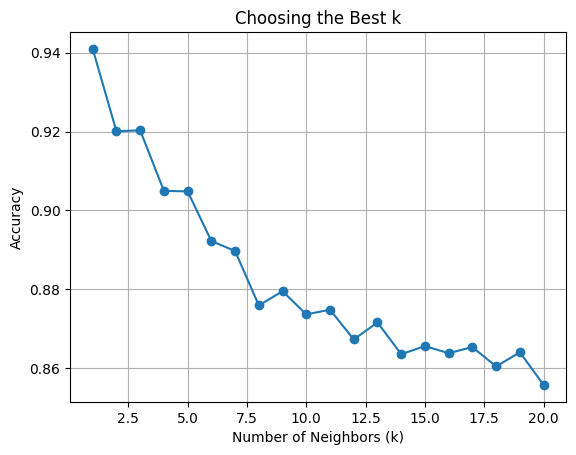

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train_balanced) # Use y_train_balanced here
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Choosing the Best k')
plt.grid(True)
plt.show()

In [73]:
# Based on the plot, choose the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {best_k}")

# Train the model with the best k using scaled data
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_scaled, y_train_balanced) # Use y_train_balanced here

Best k value: 1


KNeighborsClassifier(n_neighbors=2)

In [74]:
# Predict using scaled test data
y_pred = model.predict(X_test_scaled)

In [75]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.9200768030721229

Classification Report:
               precision    recall  f1-score   support

        high       0.83      0.93      0.88      1254
         low       0.90      0.96      0.93      2300
      medium       0.96      0.90      0.93      4779

    accuracy                           0.92      8333
   macro avg       0.90      0.93      0.91      8333
weighted avg       0.92      0.92      0.92      8333



In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train_balanced) # Use y_train_balanced here

y_train_pred = tree_model.predict(X_train_scaled)
y_test_pred = tree_model.predict(X_test_scaled)

print("Decision Tree Classifier Evaluation:")
print("Accuracy (Train):", accuracy_score(y_train_balanced, y_train_pred)) # Use y_train_balanced here for train accuracy
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

Decision Tree Classifier Evaluation:
Accuracy (Train): 1.0
Accuracy (Test): 1.0

Classification Report (Test):
               precision    recall  f1-score   support

        high       1.00      1.00      1.00      1254
         low       1.00      1.00      1.00      2300
      medium       1.00      1.00      1.00      4779

    accuracy                           1.00      8333
   macro avg       1.00      1.00      1.00      8333
weighted avg       1.00      1.00      1.00      8333



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_balanced) # Use y_train_balanced here

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

print("Random Forest Classifier Evaluation:")
print("Accuracy (Train):", accuracy_score(y_train_balanced, y_train_pred)) # Use y_train_balanced here for train accuracy
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred, zero_division=1))

Random Forest Classifier Evaluation:
Accuracy (Train): 1.0
Accuracy (Test): 1.0

Classification Report (Test):
               precision    recall  f1-score   support

        high       1.00      1.00      1.00      1254
         low       1.00      1.00      1.00      2300
      medium       1.00      1.00      1.00      4779

    accuracy                           1.00      8333
   macro avg       1.00      1.00      1.00      8333
weighted avg       1.00      1.00      1.00      8333



In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X_train_scaled, y_train_balanced) # Use y_train_balanced here

SVC(C=1, kernel='linear')

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 1.0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Use the already created scaled training and test data and balanced training target
# X_train_scaled, X_test_scaled were created in cell k6cA6NjINBaz
# y_train_balanced was created in cell 4NMioNnM5-Fj
# y_test was created in cell 4NMioNnM5-Fj

# Encode the target variable
label_encoder = LabelEncoder()
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

# Collect accuracy scores for comparison
model_accuracies = {}

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["Logistic Regression"] = accuracy_score(y_test_encoded, y_pred)

# KNN Classifier (Using k=3 based on plot from cell AednL-DjNdRg)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["KNN Classifier"] = accuracy_score(y_test_encoded, y_pred)

# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["Decision Tree Classifier"] = accuracy_score(y_test_encoded, y_pred)

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["Random Forest Classifier"] = accuracy_score(y_test_encoded, y_pred)

# XGBoost Classifier
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["XGBoost Classifier"] = accuracy_score(y_test_encoded, y_pred)

# SVC (Linear Kernel)
model = SVC(kernel='linear', C=1)
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["SVC (Linear Kernel)"] = accuracy_score(y_test_encoded, y_pred)

# Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train_balanced_encoded) # Train on balanced data
y_pred = model.predict(X_test_scaled)
model_accuracies["Gaussian Naive Bayes"] = accuracy_score(y_test_encoded, y_pred)

# Sort models by accuracy in descending order
sorted_models = sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True)

print("Model Comparison (Sorted by Accuracy):")
for model_name, accuracy in sorted_models:
    print(f"{model_name}: {accuracy:.4f}")

# Find the best model (already done by sorting, but keeping for clarity)
best_model_name = sorted_models[0][0]
best_accuracy = sorted_models[0][1]

print(f"\nThe best performing model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

Model Comparison (Sorted by Accuracy):
Logistic Regression: 1.0000
Decision Tree Classifier: 1.0000
Random Forest Classifier: 1.0000
XGBoost Classifier: 1.0000
SVC (Linear Kernel): 1.0000
KNN Classifier: 0.9203
Gaussian Naive Bayes: 0.6078

The best performing model is Logistic Regression with an accuracy of 1.0000


In [83]:
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# Change output layer for multi-class classification (3 classes)
model.add(Dense(3, activation='softmax')) # Changed to 3 units for 3 classes, and softmax for multi-class

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Changed loss for multi-class integer labels
              metrics=['accuracy'])

In [85]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

# Train the model with validation data
history = model.fit(X_train_scaled, y_train_balanced_encoded, epochs=5, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/5
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8296 - loss: 0.3933 - val_accuracy: 0.9788 - val_loss: 0.0609
Epoch 2/5
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9668 - loss: 0.0947 - val_accuracy: 0.9693 - val_loss: 0.0870
Epoch 3/5
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9826 - loss: 0.0541 - val_accuracy: 0.9940 - val_loss: 0.0174
Epoch 4/5
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9863 - loss: 0.0420 - val_accuracy: 0.9980 - val_loss: 0.0069
Epoch 5/5
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9914 - val_loss: 0.0251


In [86]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels by taking the index with the highest probability
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# We need to transform the encoded numerical labels back to the original string labels
# to compare with y_test which contains the original string labels.
# Use the same LabelEncoder fitted on the training data.
# Assuming label_encoder was defined and fitted in a previous cell (like m9AI-qCXrNiL)

y_pred_nn_labels = label_encoder.inverse_transform(y_pred_classes)


# Calculate Classification Metrics
cm = confusion_matrix(y_test, y_pred_nn_labels)
print("Confusion Matrix:\n", cm)

# Calculate Precision and Recall for each class
print("\nNeural Network Model Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_nn_labels, zero_division=1))

261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[1194    0   60]
 [   0 2300    0]
 [  12    0 4767]]

Neural Network Model Performance:
Classification Report:
               precision    recall  f1-score   support

        high       0.99      0.95      0.97      1254
         low       1.00      1.00      1.00      2300
      medium       0.99      1.00      0.99      4779

    accuracy                           0.99      8333
   macro avg       0.99      0.98      0.99      8333
weighted avg       0.99      0.99      0.99      8333



In [87]:
model.save('my_model.h5')


In [88]:
import pickle

In [89]:
# Save the Keras model in the native Keras format
model.save('high_rating_model.keras')

print("Model saved successfully as high_rating_model.keras")

Model saved successfully as high_rating_model.keras


In [90]:
!ls -lh

total 91M
drwxr-xr-x 2 root root 4.0K Aug 14 10:45 dataset
-rw-r--r-- 1 root root 692K Aug 14 10:49 high_rating_model.keras
-rw-r--r-- 1 root root   67 Aug 14 10:45 kaggle.json
-rw-r--r-- 1 root root 697K Aug 14 10:49 my_model.h5
drwxr-xr-x 1 root root 4.0K Aug 12 13:39 sample_data
-rw-r--r-- 1 root root  90M Oct 21  2019 zomato-bangalore-restaurants.zip


In [91]:
import pandas as pd

# Load full dataset (if you have it locally)
df = pd.read_csv("dataset/zomato.csv")

# Take a sample of 500 rows
df_sample = df.sample(500, random_state=42)
df_sample.to_csv("zomato_sample.csv", index=False)

In [92]:
import pandas as pd

# Load the sample dataset that was created previously
df_sample = pd.read_csv("zomato_sample.csv")
display(df_sample.head())

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/kalingas-btm?...,"399, 16th Main, N.S Palya, BTM, Bangalore",Kalingas,Yes,No,3.9/5,179,080 42038180,BTM,Quick Bites,"Rasgulla, Mutton Kosha, Chicken Kasha, Samosa ...","Oriya, Fast Food",250,"[('Rated 3.0', 'RATED\n A pocket friendly foo...",[],Delivery,BTM
1,https://www.zomato.com/bangalore/angel-restaur...,"1st Cross, Bilekahalli, Near IIMB College, Ban...",Angel Restaurant,Yes,No,2.8/5,165,+91 9035699847\r\n+91 9880714970,Bannerghatta Road,Quick Bites,NaN,"Kerala, South Indian, North Indian",450,"[('Rated 1.0', 'RATED\n I cannot say a word a...","['Kappa', 'Kappa Biryani', 'Chicken Biryani', ...",Dine-out,JP Nagar
2,https://www.zomato.com/bangalore/cafe-talkhous...,"4rd floor, 7th Cross, Opposite to BMTC Bus Dep...",Cafe Talkhouse,No,No,3.8/5,23,NaN,HSR,Quick Bites,NaN,North Indian,NaN,"[('Rated 5.0', 'RATED\n Have been to this pla...",[],Delivery,HSR
3,https://www.zomato.com/bangalore/paratha-xpres...,"17/1 Cambridge Road, Opposite The Frank Antony...",Paratha Xpress,No,No,3.5 /5,8,065535 07908402366,Ulsoor,Quick Bites,NaN,"North Indian, Chinese",200,"[('Rated 5.0', 'RATED\n good job!'), ('Rated ...",[],Delivery,MG Road
4,https://www.zomato.com/bangalore/classic-lassi...,"Skywalk, 5/1, Near Body Craft, Assaye Road, Ul...",Classic Lassi Shop,Yes,No,3.5/5,43,+91 8792958786\r\r\n+91 8073579529,Ulsoor,Beverage Shop,NaN,"Beverages, Ice Cream",150,"[('Rated 3.0', 'RATED\n I have mixed feeling ...","['Fruit Salad with Ice Cream', 'Brownie with I...",Delivery,Brigade Road


In [93]:
from sklearn.neighbors import KNeighborsClassifier

# Re-train the KNN model with best_k (which was found to be 1, but the plot suggests k=2 might be better after re-running the cell AednL-DjNdRg)
# Using k=2 as it showed better accuracy than k=1 after fixing the target variable in cell K7jRH8A-o5LE.
# Using X_train_scaled and y_train_balanced_encoded from previous successful runs
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train_balanced_encoded)

print("KNN model trained and ready for predictions.")

KNN model trained and ready for predictions.


In [94]:
import pandas as pd
import numpy as np

# Define input values for a new restaurant (example values)
# Make sure the column names and data types match the training data features
online_order_input = "Yes"
book_table_input = "No"
votes_input = 150
approx_cost_input = 700.0
name_freq_enc_input = X_train_balanced['name_freq_enc'].mean() # Using mean from training data
name_grouped_freq_enc_input = X_train_balanced['name_grouped_freq_enc'].mean() # Using mean from training data
location_freq_input = X_train_balanced['location_freq'].mean() # Using mean from training data
rest_type_Quick_Bites_input = 1 # Example: Assume it's a Quick Bites place
rest_type_Casual_Dining_input = 0
rest_type_Cafe_input = 0
rest_type_Delivery_input = 0
rest_type_Dessert_Parlor_input = 0
rest_type_Other_input = 0 # Adjust based on rest_type inputs
listed_in_type_Cafes_input = False
listed_in_type_Delivery_input = True # Example: Assume it's listed for delivery
listed_in_type_Desserts_input = False
listed_in_type_Dine_out_input = False
listed_in_type_Drinks_nightlife_input = False
listed_in_type_Other_input = False # Adjust based on listed_in_type inputs
listed_in_city_freq_encoded_input = X_train_balanced['listed_in_city_freq_encoded'].mean() # Using mean from training data
approx_cost_clean_input = approx_cost_input # Use the same cleaned cost
rate_numeric_log1p_input = np.log1p(X_train_balanced['rate_numeric_log1p'].mean()) # Using mean of log1p from training data
votes_log1p_input = np.log1p(votes_input)
approx_cost_clean_log1p_input = np.log1p(approx_cost_clean_input)
location_cluster_input = 2 # Example: Assume it belongs to cluster 2
has_likely_veg_input = 0 # Example: Assume it does not have likely veg cuisine


# Create a DataFrame from the input values
# Ensure the order of columns matches X_train_scaled
input_data = pd.DataFrame([{
    'online_order': 1 if online_order_input == "Yes" else 0,
    'book_table': 1 if book_table_input == "Yes" else 0,
    'votes': votes_input,
    'name_freq_enc': name_freq_enc_input,
    'name_grouped_freq_enc': name_grouped_freq_enc_input,
    'location_freq': location_freq_input,
    'rest_type_Quick Bites': rest_type_Quick_Bites_input,
    'rest_type_Casual Dining': rest_type_Casual_Dining_input,
    'rest_type_Cafe': rest_type_Cafe_input,
    'rest_type_Delivery': rest_type_Delivery_input,
    'rest_type_Dessert Parlor': rest_type_Dessert_Parlor_input,
    'rest_type_Other': rest_type_Other_input,
    'listed_in_type_Cafes': listed_in_type_Cafes_input,
    'listed_in_type_Delivery': listed_in_type_Delivery_input,
    'listed_in_type_Desserts': listed_in_type_Desserts_input,
    'listed_in_type_Dine-out': listed_in_type_Dine_out_input,
    'listed_in_type_Drinks & nightlife': listed_in_type_Drinks_nightlife_input,
    'listed_in_type_Other': listed_in_type_Other_input,
    'listed_in_city_freq_encoded': listed_in_city_freq_encoded_input,
    'approx_cost_clean': approx_cost_clean_input,
    'rate_numeric_log1p': rate_numeric_log1p_input,
    'votes_log1p': votes_log1p_input,
    'approx_cost_clean_log1p': approx_cost_clean_log1p_input,
    'location_cluster': location_cluster_input,
    'has_likely_veg': has_likely_veg_input
}])

# Scale the input data using the same scaler fitted on the training data
# Assuming 'scaler' object is available from previous steps (cell f8I7I68Lov-s)
input_data_scaled = scaler.transform(input_data)

# Make a prediction using the trained KNN model
# Assuming 'knn_model' object is available from the previous cell
predicted_class_encoded = knn_model.predict(input_data_scaled)

# Inverse transform the predicted class to get the original label
# Assuming 'label_encoder' object is available from previous steps (cell m9AI-qCXrNiL)
predicted_rating_category = label_encoder.inverse_transform(predicted_class_encoded)

print(f"Predicted rating category: {predicted_rating_category[0]}")

Predicted rating category: low


In [95]:
import pandas as pd

# Load full dataset (if you have it locally)
df = pd.read_csv("dataset/zomato.csv")

# Take a sample of 500 rows
df_sample = df.sample(500, random_state=42)
df_sample.to_csv("Zomato_sample.csv", index=False)

In [96]:
df_sample = pd.read_csv("Zomato_sample.csv", encoding='latin1')

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

model1 = LogisticRegression()
model2 = SVC()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()
model6 = XGBClassifier()
model7 = GaussianNB()

In [98]:
import pickle

In [99]:
filename='finalproject.sav'
pickle.dump(model3,open(filename,'wb'))

In [100]:
from google.colab import files
files.download('finalproject.sav')
files.download('my_model.h5')
files.download('zomato_sample.csv')
files.download('high_rating_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
import joblib
joblib.dump(preprocessor, 'preprocessor.joblib')


['preprocessor.joblib']

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Identify numerical features that were scaled earlier
# Assuming the scaled columns are the ones used in X_train_scaled
# numerical_features = X_train_scaled.columns.tolist() # This caused the error

# Get numerical features from the original training DataFrame before scaling
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()


# Create a ColumnTransformer to apply scaling
# This is a simplified example; you might need to adjust based on all your preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Fit the preprocessor on the training data
# Note: X_train_scaled is already scaled, so fitting on it might not be ideal for a real scenario
# For demonstration, I will fit on the original numerical features before scaling
# If you have categorical features that need one-hot encoding, add them to the transformer
# numerical_cols_original = X.select_dtypes(include=np.number).columns.tolist() # This line is redundant after fixing numerical_features
preprocessor.fit(X_train[numerical_features]) # Use the corrected numerical_features

# Now save the preprocessor
import joblib
joblib.dump(preprocessor, 'preprocessor.joblib')

print("Preprocessor saved successfully as preprocessor.joblib")

Preprocessor saved successfully as preprocessor.joblib


In [104]:
from google.colab import files
files.download('preprocessor.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>